In [23]:
import pandas as pd
import numpy as np

from sklearn import linear_model

In [3]:
dates = pd.date_range("2020", "2024")

In [4]:
n = len(dates)

In [5]:
is_promoted = np.random.randint(0, 2, size=n)

In [6]:
pd.Series(is_promoted)

0       1
1       0
2       1
3       1
4       1
       ..
1457    0
1458    0
1459    0
1460    1
1461    1
Length: 1462, dtype: int64

In [49]:
promo_lift_multiplier = 4
regular_sales = 100 

In [50]:
#sales = np.exp(np.ones(n) * np.log(regular_sales) + np.random.normal(size=n)*1 )
sales = np.exp(np.ones(n) * np.log(regular_sales) + (is_promoted * promo_lift_multiplier) + np.random.normal(size=n)*1 )

In [51]:
df = pd.DataFrame(data=[dates, is_promoted, sales], index=["date", "is_promoted", "sales"] ).T.set_index("date")

/home/codespace/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [62]:
df["sales"] = df["sales"].astype("float")

<Axes: xlabel='date'>

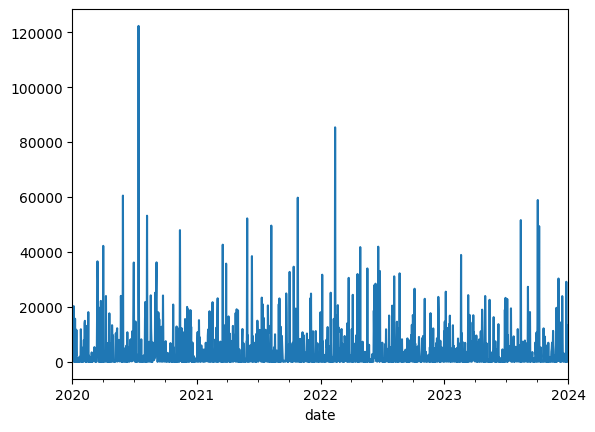

In [63]:
df["sales"].plot()

In [78]:
df["sales"].mean()

4437.475367886207

In [79]:
np.exp(df["sales"].apply(lambda x: np.log(x)).mean() + df["sales"].apply(lambda x: np.log(x)).std()**2 / 2)

8762.835852838958

In [80]:
np.exp(df["sales"].apply(lambda x: np.log(x)).mean() + (1)**2/2)

1168.2341995421714

In [81]:
df[df["is_promoted"]==0]["sales"].mean()

168.5808009595147

In [82]:
reg = linear_model.LinearRegression()

In [83]:
df_weekly = df.resample("W").mean()

In [84]:
X = df["is_promoted"].to_numpy().reshape(-1, 1)
y = np.log(df["sales"])

In [85]:
reg.fit(X, y).coef_

array([4.01705547])

In [86]:
X = df_weekly["is_promoted"].to_numpy().reshape(-1, 1)
y = np.log(df_weekly["sales"])

In [87]:
reg.fit(X, y).coef_

array([2.69932535])